## E-Learning Engagement Analysis

In [48]:
# Import pandas library for data manipulation and analysis
import pandas as pd
# Import matplotlib's pyplot for creating visualizations
import matplotlib.pyplot as plt
# Import seaborn for statistical data visualization
import seaborn as sns
# Import datetime for handling date and time data
from datetime import datetime
# Set the visual style of seaborn plots to 'whitegrid' for better readability
sns.set(style = 'whitegrid')

##### Load Data

In [47]:
# Load user data from CSV file
users = pd.read_csv('users.csv')
# Load session data from CSV file and parse date columns
sessions = pd.read_csv('sessions.csv', parse_dates= ['login_time', 'logout_time'])
# Load content view data from CSV file and parse timestamp column
views = pd.read_csv('content_views.csv', parse_dates=['timestamp'])
# Load content catalog data from CSV file
content = pd.read_csv('content_catalog.csv')

##### Preprocessing

In [49]:
# Calculate session duration in minutes by finding the difference between logout and login times
# and converting from seconds to minutes
sessions['session_minutes'] = (sessions['logout_time'] - sessions['login_time']).dt.total_seconds()/ 60

# Merge the views dataframe with the content dataframe on content_id column
# Using left join to keep all records from views even if there's no match in content
views_merged = pd.merge(views, content, on='content_id', how='left')

##### Session Duration Histogram

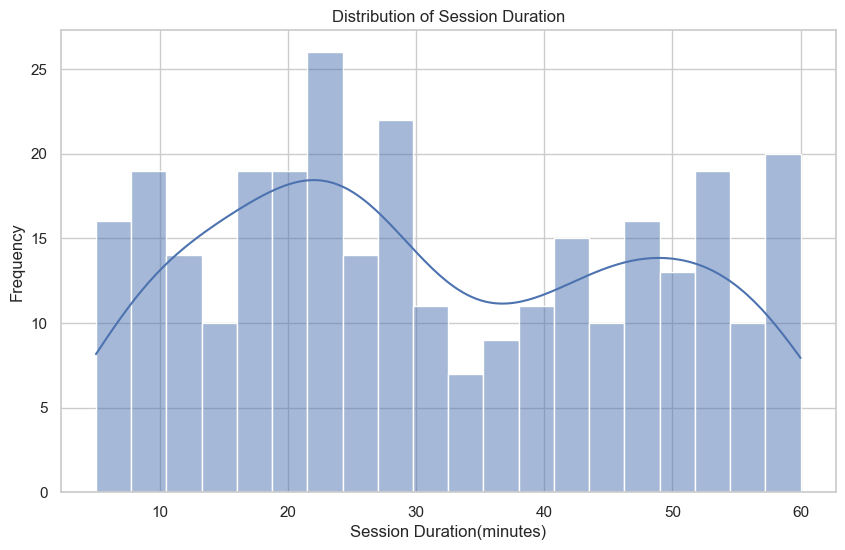

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(sessions['session_minutes'], bins=20, kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration(minutes)')
plt.ylabel('Frequency')
plt.savefig('Session Duration Histogram')
plt.show()

##### Content Views by Type

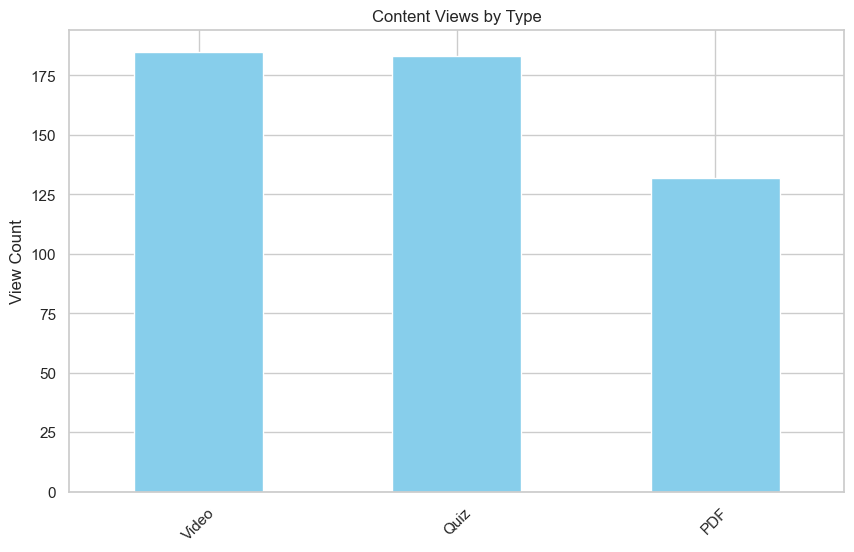

In [17]:
plt.figure(figsize=(10,6))

# Plot a bar chart of content type counts with skyblue color
views_merged['type'].value_counts().plot(kind = 'bar', color = 'skyblue')

plt.title('Content Views by Type')
plt.ylabel('View Count')
plt.xlabel('')
plt.xticks(rotation = 45)
plt.savefig('Content Views by Type')
plt.show()

##### Top 10 Most Viewed Content

C:\Users\ROHIT\AppData\Local\Temp\ipykernel_18948\840315336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = top_content.index, x = top_content.values, palette='viridis')


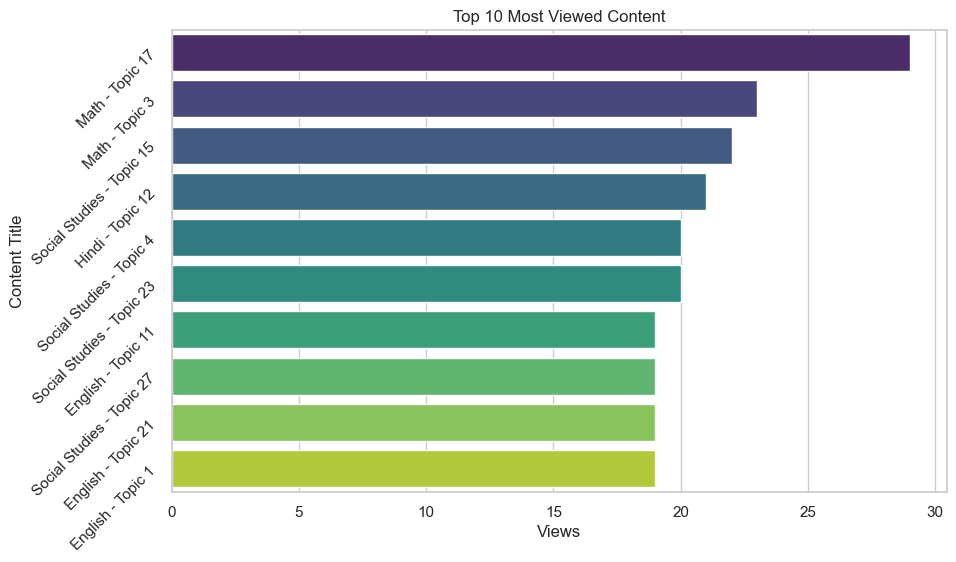

In [38]:
top_content = views_merged['title'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y = top_content.index, x = top_content.values, palette='viridis')
plt.title('Top 10 Most Viewed Content')
plt.xlabel('Views')
plt.ylabel('Content Title')
plt.yticks(rotation = 45)
plt.savefig('Top 10 Most Viewed Content')
plt.show()

##### Daily Views Trend

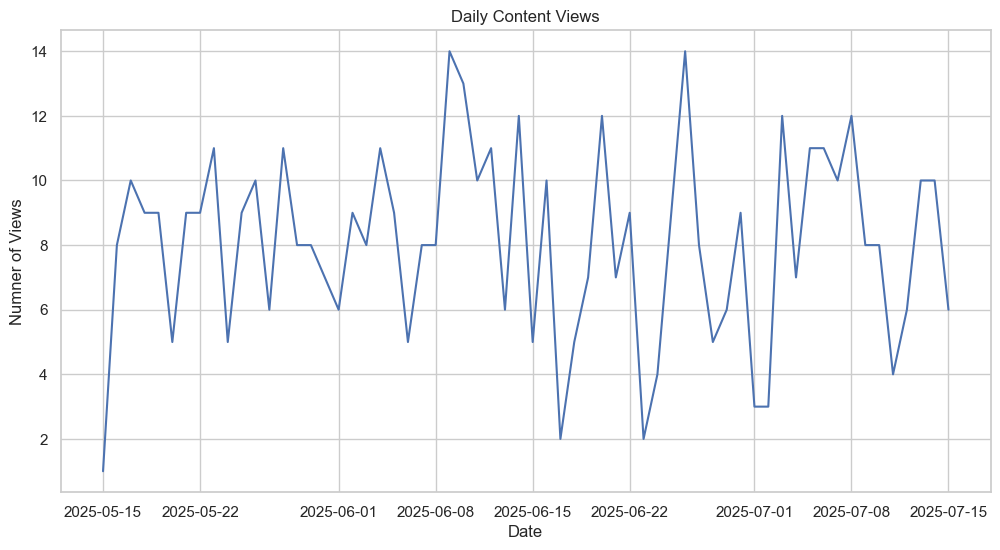

In [32]:
views_merged['date'] = views_merged['timestamp'].dt.date
daily_views = views_merged.groupby('date').size()
daily_views.plot(kind = 'line', figsize= (12,6), title = 'Daily Content Views')
plt.xlabel('Date')
plt.ylabel('Numner of Views')
plt.grid(True)
plt.savefig('Daily Content Views')
plt.show()

##### Avg Session Duration by Grade

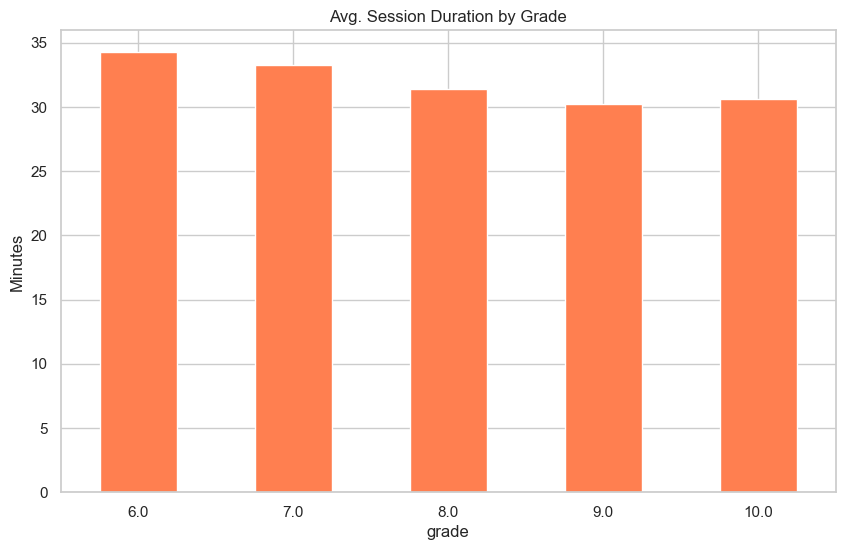

In [45]:
merged_sessions = pd.merge(sessions, users[['user_id', 'grade']], on='user_id', how='left')
grade_sessions = merged_sessions.groupby('grade')['session_minutes'].mean().dropna()
grade_sessions.plot(kind = 'bar', figsize = (10,6), color = 'coral', title ='Avg. Session Duration by Grade')
plt.ylabel('Minutes')
plt.xticks(rotation = 0)
plt.savefig('Avg_Session_Duration_by_Grade')
plt.show()